In [2]:
import folium
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# data load
nodes = pd.read_csv('./data/bike_node(21.01.31).csv')
links1 = pd.read_csv('./data/group_weekday.csv')
links2 = pd.read_csv('./data/group_weekend.csv')
links3 = pd.read_csv('./data/group_on.csv')
links4 = pd.read_csv('./data/group_off.csv')

# x 보다 큰 것만 생각하기
def new_links(x, n):
    x = x[x['number'] > n]
    return x

In [62]:
# list 2차원 배열로 만들기
def make_simple_list(x):
    list1 = list(x['start'])
    list2 = list(x['end'])

    return list(zip(list1, list2))

In [72]:
list3 = make_simple_list(links1)

# id, 위경도만 있는 데이터
nodes_1=nodes[['id', 'latitude', 'longitude']]

# id만 있는 리스트형태
nodes_sim = list(nodes_1['id'])

In [73]:
# 엣지 없는 노드 지우기
l1 = [1319,1114,312,485,113,2547,445,3305,2539,3112,2543,2263,3304,444]

for i in l1:
    nodes_sim.remove(i)

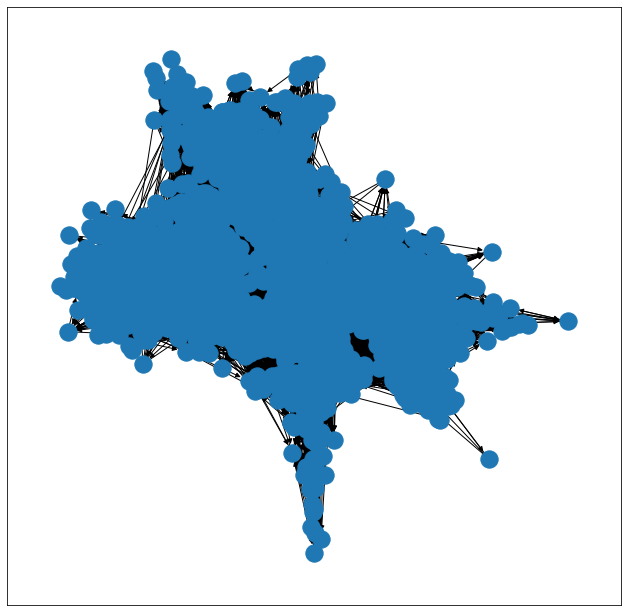

In [77]:
plt.figure(figsize = (11,11))

G = nx.DiGraph()
G.add_nodes_from(nodes_sim)
G.add_edges_from(list3)
degree = nx.degree(G)

nx.draw_networkx(G, nodes_size = 0.1, with_labels = False)